# RFP: Targeted Taco Bell Ads

## Project Overview
You are invited to submit a proposal that answers the following question:

### What ad will you create and why?

*Please submit your proposal by **1/30/25 at 11:59 PM**.*

## Required Proposal Components

### 1. Data Description
In the code cell below, read in the data you will need to train and test your model. Call `info()` once you have read the data into a dataframe. Consider using some or all of the following sources:
- [Customer Demographics](https://drive.google.com/file/d/1HK42Oa3bhhRDWR1y1wVBDAQ2tbNwg1gS/view?usp=sharing)
- [Ad Response Data](https://drive.google.com/file/d/1cuLqXPNKhP66m5BP9BAlci2G--Vopt-Z/view?usp=sharing)

*Note, a level 5 dataset combines these two data sets.*

In [1]:
import pandas as pd
import typing
from typing import List
from kMeans import KMeans

import matplotlib.pyplot as plt
import random
%matplotlib inline

In [2]:
c_df = pd.read_csv("customer_data.csv")
a_df = pd.read_csv("ad_data.csv")

In [3]:
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  10000 non-null  int64  
 1   state        10000 non-null  object 
 2   sex          10000 non-null  object 
 3   age          10000 non-null  float64
 4   occupation   10000 non-null  object 
 5   family_size  10000 non-null  int64  
 6   income       10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


In [4]:
a_df

,customer_id,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
0,3226,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['gatorade', 'mug root beer', 'baja blast', 'd..."
1,5217,DISCOUNT-50%,15 sec YouTube ad,False,"['crunchy taco', 'cheesy bean and rice burrito']","['gatorade', 'diet pepsi']"
2,5247,REWARD - Free Garlic Steak Nacho Fries with pu...,15 sec YouTube ad,True,"['steak garlic nacho fries', 'cheesy gordita c...","['mountain dew', 'starry']"
3,7793,DISCOUNT-5%,30 sec Hulu commercial,False,"['crunchwrap supreme', 'cravings box', 'crunch...","['baja blast', 'brisk', 'mountain dew']"
4,5759,DISCOUNT-50%,15 sec YouTube ad,False,"['nachos bellgrande', 'crunchy taco']","['pepsi', 'diet pepsi']"
...,...,...,...,...,...,...
9995,904,BOGO - Baja Blast,15 sec TikTok ad,False,['steak garlic nacho fries'],['mountain dew']
9996,8731,DISCOUNT-5%,Static Facebook ad,False,"['crunchwrap supreme', 'spicy potato soft taco...","['mountain dew', 'brisk', 'starry', 'baja blast']"
9997,7396,DISCOUNT-10%,15 sec TikTok ad,False,['steak garlic nacho fries'],['gatorade']
9998,8559,DISCOUNT-10%,30 sec cable TV ad,False,"['cinnamon twists', 'mexican pizza', 'cinnamon...","['gatorade', 'mug root beer', 'iced tea', 'ice..."


In [5]:
df = pd.merge(c_df, a_df, on = "customer_id", how = "inner")

In [6]:
df

,customer_id,state,sex,age,occupation,family_size,income,ad_type,ad_medium,ad_response,items_purchased,drinks_purchased
0,9167,MO,F,42.0,Food Service,1,40343,DISCOUNT-20%,Instagram photo ad,True,"['mexican pizza', 'chicken quesadilla']","['mountain dew', 'mug root beer']"
1,531,MI,F,36.0,Retail,4,41730,DISCOUNT-10%,Instagram photo ad,False,"['steak garlic nacho fries', 'crunchy taco', '...","['mug root beer', 'iced tea', 'starry', 'iced ..."
2,2265,CA,F,25.0,IT,0,84024,DISCOUNT-20%,15 sec YouTube ad,False,['chicken quesadilla'],['mug root beer']
3,7550,VA,M,38.0,Food Service,2,38990,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['pepsi', 'diet pepsi', 'diet pepsi']"
4,5334,MT,M,35.0,Food Service,1,33400,DISCOUNT-20%,15 sec YouTube ad,False,"['spicy potato soft taco', 'nachos bellgrande']","['gatorade', 'baja blast']"
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3616,AL,F,47.0,Healthcare,3,143571,DISCOUNT-10%,30 sec Hulu commercial,False,"['chicken quesadilla', 'steak garlic nacho fri...","['baja blast', 'baja blast', 'gatorade', 'iced..."
9996,7670,NY,M,30.0,Retail,2,37865,DISCOUNT-5%,15 sec YouTube ad,False,"['soft taco', 'chicken quesadilla', 'steak gar...","['gatorade', 'iced tea', 'mug root beer']"
9997,7248,MO,F,42.0,Government,3,96691,BOGO - Garlic Steak Nacho Fries,15 sec YouTube ad,True,"['steak garlic nacho fries', 'steak garlic nac...","['diet pepsi', 'iced tea', 'baja blast', 'brisk']"
9998,7699,AZ,F,26.0,Government,1,62191,BOGO - Baja Blast,15 sec YouTube ad,True,"['spicy potato soft taco', 'crunchy taco']","['baja blast', 'baja blast']"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   state             10000 non-null  object 
 2   sex               10000 non-null  object 
 3   age               10000 non-null  float64
 4   occupation        10000 non-null  object 
 5   family_size       10000 non-null  int64  
 6   income            10000 non-null  int64  
 7   ad_type           10000 non-null  object 
 8   ad_medium         10000 non-null  object 
 9   ad_response       10000 non-null  bool   
 10  items_purchased   10000 non-null  object 
 11  drinks_purchased  10000 non-null  object 
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 947.3+ KB


In [8]:
df['ad_type'].unique

<bound method Series.unique of 0                                            DISCOUNT-20%
1                                            DISCOUNT-10%
2                                            DISCOUNT-20%
3                         BOGO - Garlic Steak Nacho Fries
4                                            DISCOUNT-20%
                              ...                        
9995                                         DISCOUNT-10%
9996                                          DISCOUNT-5%
9997                      BOGO - Garlic Steak Nacho Fries
9998                                    BOGO - Baja Blast
9999    REWARD - Free Baja Blast with purchase of $20 ...
Name: ad_type, Length: 10000, dtype: object>

In [9]:
for i in range(len(df)):
    adtype = df.loc[i]['ad_type']
    if str(adtype) == "DISCOUNT-5%":
        df.at[i, 'ad_type'] = 5
    elif str(adtype) == "DISCOUNT-10%":
        df.at[i, 'ad_type'] = 10
    elif str(adtype) == "DISCOUNT-20%":
        df.at[i, 'ad_type'] = 20
    elif str(adtype) == "DISCOUNT-50%":
        df.at[i, 'ad_type'] = 50
    elif "BOGO" in adtype:
        df.at[i, 'ad_type'] = 100
    elif "REWARD" in adtype:
        df.at[i, 'ad_type'] = 0
    else:
        print(adtype)
     
df['ad_type'] = df['ad_type'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   state             10000 non-null  object 
 2   sex               10000 non-null  object 
 3   age               10000 non-null  float64
 4   occupation        10000 non-null  object 
 5   family_size       10000 non-null  int64  
 6   income            10000 non-null  int64  
 7   ad_type           10000 non-null  int64  
 8   ad_medium         10000 non-null  object 
 9   ad_response       10000 non-null  bool   
 10  items_purchased   10000 non-null  object 
 11  drinks_purchased  10000 non-null  object 
dtypes: bool(1), float64(1), int64(4), object(6)
memory usage: 1.2+ MB


### 2. Training Your Model
In the cell seen below, write the code you need to train a K-means clustering model. Make sure you describe the center of each cluster found.

I wanted to graph the data, so here it is:

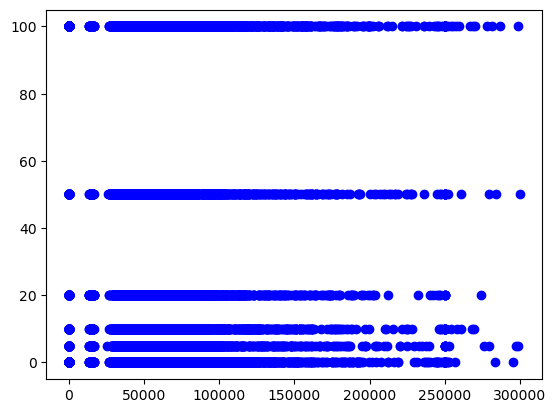

In [10]:
plt.plot(df["income"], df["ad_type"], 'bo')

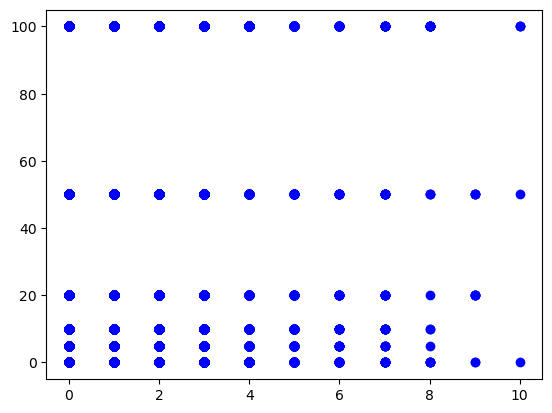

In [11]:
plt.plot(df["family_size"], df["ad_type"], 'bo')

In [12]:
test_df = df[['ad_type','income', 'family_size']]
kMeans = KMeans(test_df, 10)

In [13]:
assignments, centroids, wcss  = kMeans.run_iterations()

In [14]:
print(centroids)

     ad_type         income  family_size
0  36.230432   47932.556043     1.839073
1  34.582569   35732.905046     1.711468
2  34.381188  120157.107261     1.985149
3  38.202765  186542.866359     1.861751
4  35.434783    5300.220227     2.147448
5  36.002415  148585.669082     2.357488
6  39.702381  248209.660714     2.619048
7  36.885081   62907.847446     1.788978
8  36.030596   78708.489533     1.791465
9  37.902913   97181.245631     2.053398


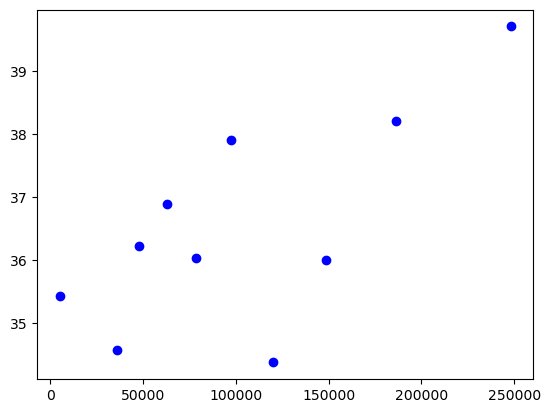

In [15]:
plt.plot(centroids['income'], centroids['ad_type'], 'bo')

Strangely enough, those who have a decent income prefer to eat at Taco bell when they are having a big discount. This result may occur since wealthier people may tend to shop at higher quality places only going to Taco bell for specific reasons(decent discount). This is a direct relationship with the more money you make the more likely you are to eat at Taco Bell for a discount.

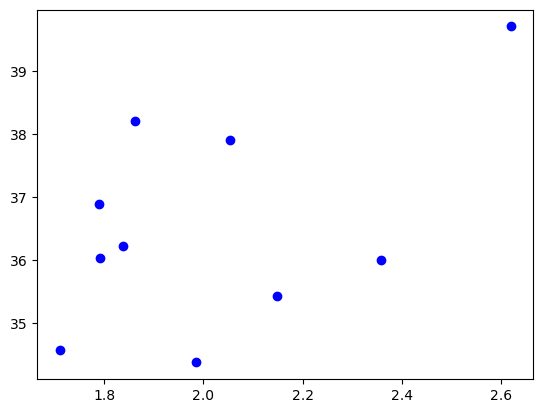

In [16]:
plt.plot(centroids['family_size'], centroids['ad_type'], 'bo')

It appears that those with a bigger family are far more likely to respond to a decent sale. This is a direct pattern where the more family members you have the more discounts you are going to apply to. Strange, it's like feeding people is rather expensive. 

### 3. Testing Your Model
In the cell seen below, write the code you need to test your K-means model. Then, interpret your findings.

*Note, level 5 testing uses both an elbow plot and a silhouette score to evaluate your model. Level 4 uses one or the other.*

In [17]:
wcss_values = []
silhouette_avg_values = []
silhouette_scores_dict = {}
silhouette_scores = []

def get_centroids(data: pd.DataFrame, max_k: int):
    k_values = range(1, max_k + 1)
    
    for k in k_values:
        kMeans = KMeans(data, k)
        assignments, centroids, wcss = kMeans.run_iterations()
        wcss_values.append(wcss)
        silhouette_scores = kMeans.calculate_silhoutte(assignments)
        silhouette_avg_values.append(silhouette_scores.mean())
        silhouette_scores_dict[k] = (assignments, silhouette_scores)
        print(f"K : {k}, centroid : {centroids}, silhouette : {silhouette_scores}")
        
    return k_values
        
#I spent so long developing my own k-means algorithm I forgot seaborn was an option...oops       
def plot_elbow(k_values):
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, wcss_values, marker='o', linestyle='--', color='b')
    plt.title('Elbow Plot for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(k_values)
    plt.grid()
    
def plot_silhouette(k_values):
    best_k = k_values[silhouette_avg_values.index(max(silhouette_avg_values))]
    clusters, silhouette_scores = silhouette_scores_dict[best_k]

    # Generate silhouette plot
    plt.subplot(1, 2, 2)
    y_lower = 10
    for cluster in range(best_k):
        cluster_scores = silhouette_scores[clusters == cluster].sort_values()
        size_cluster = len(cluster_scores)
        y_upper = y_lower + size_cluster
        plt.fill_betweenx(range(y_lower, y_upper), 0, cluster_scores, alpha=0.7)
        y_lower = y_upper + 10  # Add space between clusters

    plt.axvline(x=silhouette_scores.mean(), color="red", linestyle="--")  # Average silhouette score line
    plt.title(f"Silhouette Plot for k={best_k}")
    plt.xlabel("Silhouette Coefficient")
    plt.ylabel("Cluster Size")
    plt.grid()

    plt.tight_layout()
    plt.show()


In [18]:
test_df = df[['ad_type','income', 'family_size']]
kValues = get_centroids(test_df, 10)

K : 1, centroid :    ad_type      income  family_size
0  36.0115  66802.1861       1.8965, silhouette : 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
9995   NaN
9996   NaN
9997   NaN
9998   NaN
9999   NaN
Length: 10000, dtype: float64
K : 2, centroid :      ad_type         income  family_size
0  36.911889  131126.586003     2.115093
1  35.731515   46799.894992     1.828526, silhouette : 0       0.943723
1       0.943918
2       0.531410
3       0.943203
4       0.938096
          ...   
9995    0.795876
9996    0.942541
9997   -0.011290
9998    0.884528
9999    0.928568
Length: 10000, dtype: float64
K : 3, centroid :      ad_type         income  family_size
0  36.051780   87132.893743     1.899946
1  35.705516   35998.111417     1.834524
2  37.832335  177834.008383     2.286228, silhouette : 0       0.872935
1       0.860351
2       0.865732
3       0.882808
4       0.904168
          ...   
9995    0.194832
9996    0.889424
9997    0.891619
9998    0.025977
9999   

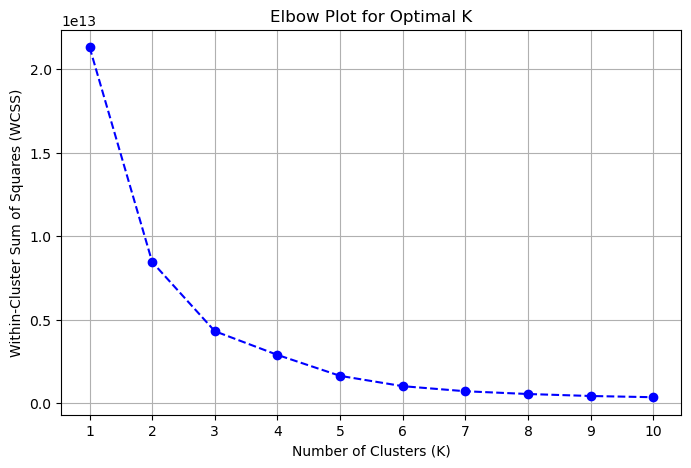

In [20]:
plot_elbow(kValues)

Elbow Plot Interpretation: This elbow plot shows that there are roughly 4 different clusters. The elbow occurs at K = 3 with two clusters occuring before the bend. There then appears to be two main clusters after the elbow, with a group between K=3 and K=5, and a group from K=5 to K=10. This shows that there are 4 primary groups of consumers.

### 4. Final Answer

In the first cell seen below, describe the cluster you have chosen to target with your ad, making sure to describe the type of ad they were the most likely to respond to. Then, use software of your choosing to create the ad you will need to target this cluster. You do not need to create an ad for both the nacho fries and the Baja Blast. You can focus on one if that's what your cluster cares about most.

In the second cell seen below, include a link to your ad.

*Note, a level 5 ad uses the medium (static image or video) the cluster most likely responded to.* 

I am going to appeal to rather large families(probably 5+ members), by using a rather high deal that applies to families. If a deal is only applicable to groups of 5+ or the deal get better per each person, than bigger groups are going to be more enticed towards the product. 

#### Link your ad here.

<img src="C:\Users\lbarber\OneDrive - Cherry Creek School District\Desktop\Github\AI\Semester2\Unit1\TacoBell\TacoBell-ad.png" width=60 height=60 />